## import liberaies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.cm as cm
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


In [3]:
test.shape
train.shape

(42000, 785)

In [4]:
test = test.values.astype('float32')
test = test.reshape(-1, 28, 28, 1)
X_val = train.iloc[:, 1:].values.astype('float32') 
X_val = X_val.reshape(-1, 28, 28, 1) 
y_val = train.iloc[:, 0].values.astype('int32')      
print(X_val.shape, y_val.shape)     


(42000, 28, 28, 1) (42000,)


In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=np.vstack((X_train,X_test))
y_train=np.concatenate([y_train,y_test])
X_train=X_train.reshape(-1,28,28,1)
X_train.shape,y_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((70000, 28, 28, 1), (70000,))

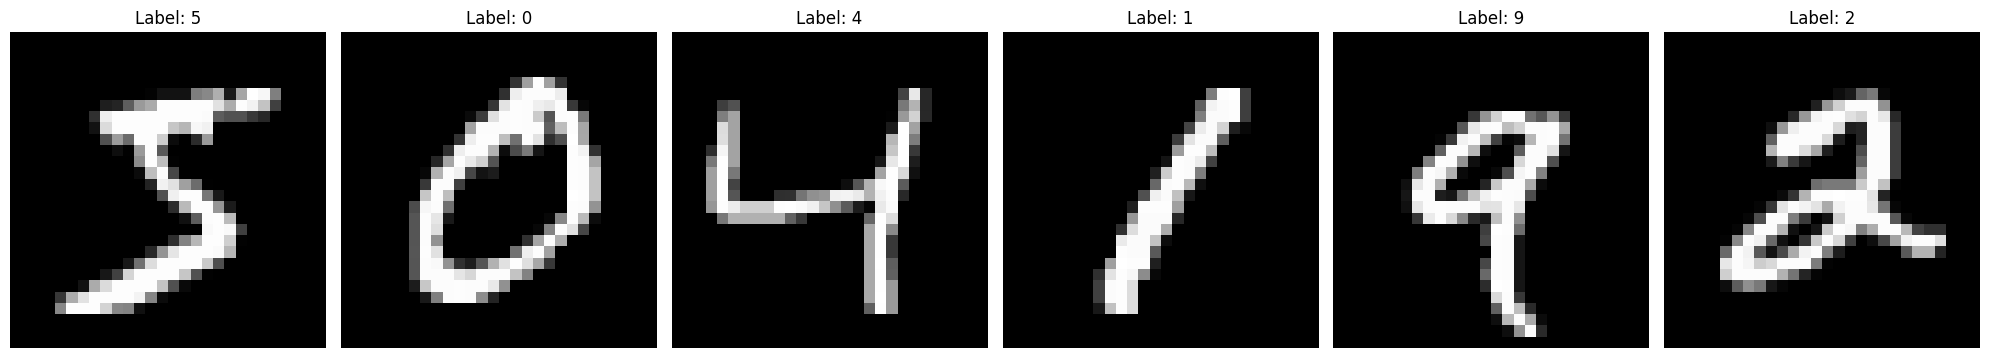

In [6]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 6

# Create subplots
fig, axes = plt.subplots(1, num_images, figsize=(20, 20))

# Display each image with its label
for i in range(num_images):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')  # Reshape and display each image
    axes[i].set_title(f"Label: {y_train[i]}")  # Set title as label
    axes[i].axis('off')  # Hide axis for clarity

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


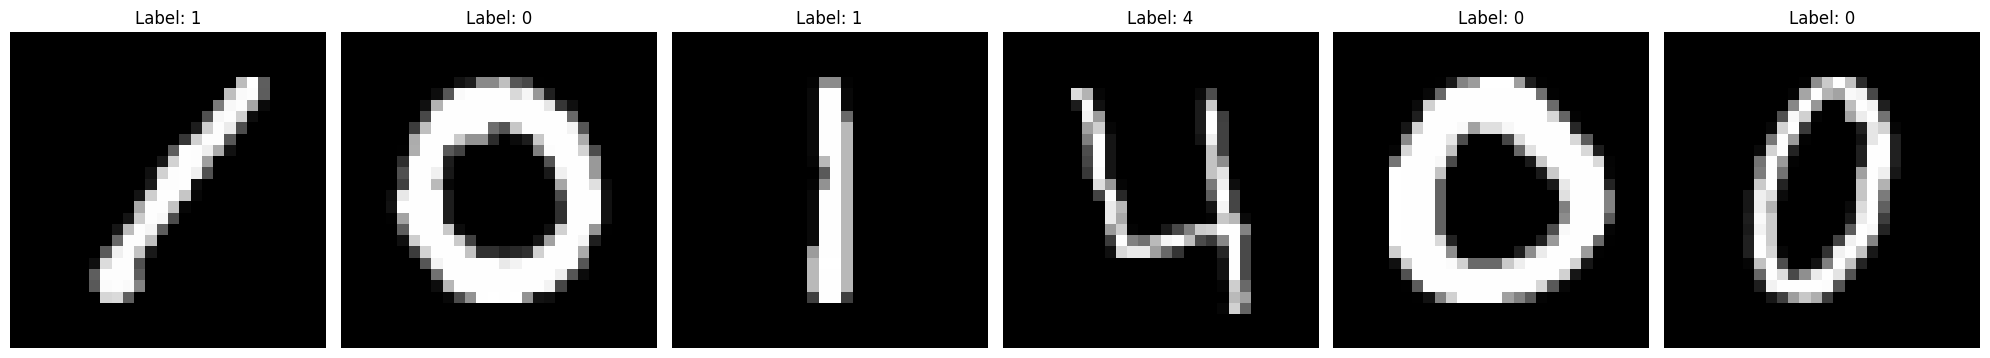

In [7]:
fig, ax = plt.subplots(1, 6, figsize=(20, 20))

# Loop through the first 6 images
for u in range(6):
    ax[u].imshow(X_val[u].reshape(28, 28), cmap='gray')  # Reshape to 28x28 and display image
    ax[u].set_title(f"Label: {y_val[u]}")  # Set title as label for each image
    ax[u].axis('off')  # Hide axis for better visualization

plt.tight_layout()  # Adjust layout for spacing
plt.show()


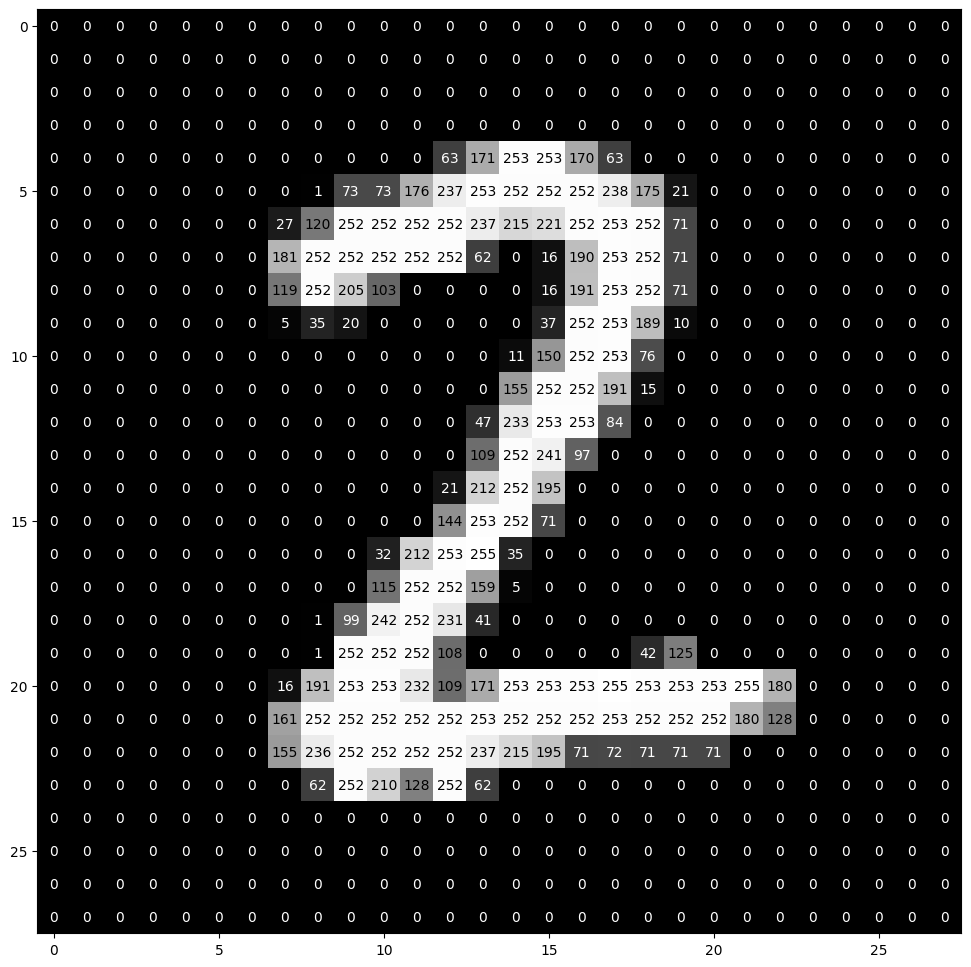

In [8]:
def img_to_num(img, ax):
    ax.imshow(img, cmap='gray')
    w, h = img.shape
    thresh = img.max() / 2.5
    for x in range(w):
        for y in range(h):
            ax.annotate(
                str(round(img[x, y])),
                xy=(y, x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x, y] < thresh else 'black'
            )

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
img_to_num(X_val[22].reshape(28, 28), ax)  
plt.show()
    

## normalization

In [9]:
X_train = X_train/255
test = test/255
X_val = X_val/255

## label encoding

In [10]:
print("Before catagorizing ",y_train[77])
y_train=to_categorical(y_train,10)
y_val=to_categorical(y_val,10)
print("Before catagorizing " ,y_train[77])

Before catagorizing  1
Before catagorizing  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:

model = Sequential()

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=192,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=192,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 192)      │       921,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,302,090 (8.78 MB)

 Trainable params: 2,302,090 (8.78 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

lr = ReduceLROnPlateau(monitor='loss',factor = 0.3,verbose = 1,patience = 2,min_lr = 10e-8)


history=model.fit(X_train,y_train,batch_size = 128,epochs = 50,validation_data=(X_val,y_val),callbacks = [lr],verbose=1,shuffle=True)

model.save('my_model.h5') 

Epoch 1/50


I0000 00:00:1731185662.836368     102 service.cc:145] XLA service 0x79b9c8007670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731185662.836421     102 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  7/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.1979 - loss: 2.2348

I0000 00:00:1731185667.610694     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


547/547 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8899 - loss: 0.3478 - val_accuracy: 0.9931 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9951 - val_loss: 0.0161 - learning_rate: 0.0010
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9937 - loss: 0.0211 - val_accuracy: 0.9957 - val_loss: 0.0150 - learning_rate: 0.0010
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9951 - val_loss: 0.0154 - learning_rate: 0.0010
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9978 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9982 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9970 - loss: 0.0095

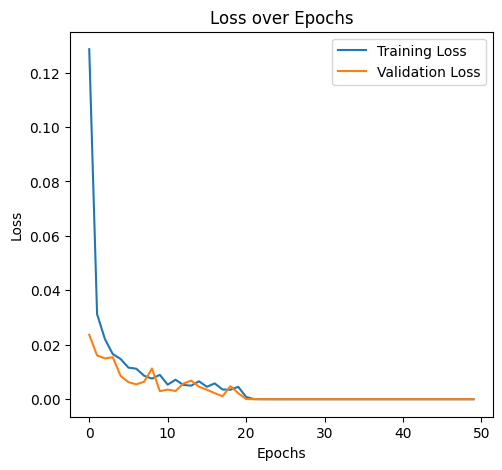

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [17]:
pred  = model.predict(test,verbose=2)
pred_classes = np.argmax(pred, axis=1)

875/875 - 3s - 3ms/step


In [19]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission["Label"] = pred_classes
submission.to_csv('submission.csv',index=False)
print("Submission file created")


Submission file created


In [20]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## now lets evaluate our model ofrom train data

In [21]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Make predictions on the training and validation sets
pred_tr = model.predict(X_train).argmax(axis=1)  # Predict on training data and get class labels
pred_val = model.predict(X_val).argmax(axis=1)   # Predict on validation data and get class labels

# Convert one-hot encoded y_train and y_val to label format for metric calculations
y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)

# Training Evaluation Metrics
print('Training Evaluation Metrics:\n')

print('Classification Report (Training):\n', classification_report(y_train_labels, pred_tr))
print('Accuracy (Training):', accuracy_score(y_train_labels, pred_tr))
print('Precision (Training):', precision_score(y_train_labels, pred_tr, average='micro'))
print('Recall (Training):', recall_score(y_train_labels, pred_tr, average='micro'))
print('F1 Score (Training):', f1_score(y_train_labels, pred_tr, average='micro'))

print('\nTesting Evaluation Metrics:\n')

# Validation (Testing) Evaluation Metrics
print('Classification Report (Testing):\n', classification_report(y_val_labels, pred_val))
print('Accuracy (Testing):', accuracy_score(y_val_labels, pred_val))
print('Precision (Testing):', precision_score(y_val_labels, pred_val, average='micro'))
print('Recall (Testing):', recall_score(y_val_labels, pred_val, average='micro'))
print('F1 Score (Testing):', f1_score(y_val_labels, pred_val, average='micro'))


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Training Evaluation Metrics:

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6903
           1       1.00      1.00      1.00      7877
           2       1.00      1.00      1.00      6990
           3       1.00      1.00      1.00      7141
           4       1.00      1.00      1.00      6824
           5       1.00      1.00      1.00      6313
           6       1.00      1.00      1.00      6876
           7       1.00      1.00      1.00      7293
           8       1.00      1.00      1.00      6825
           9       1.00      1.00      1.00      6958

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Accuracy (Training): 1.0
Precision (Training): 1.0
Recall (Training): 1.0
F1 Score (Traini

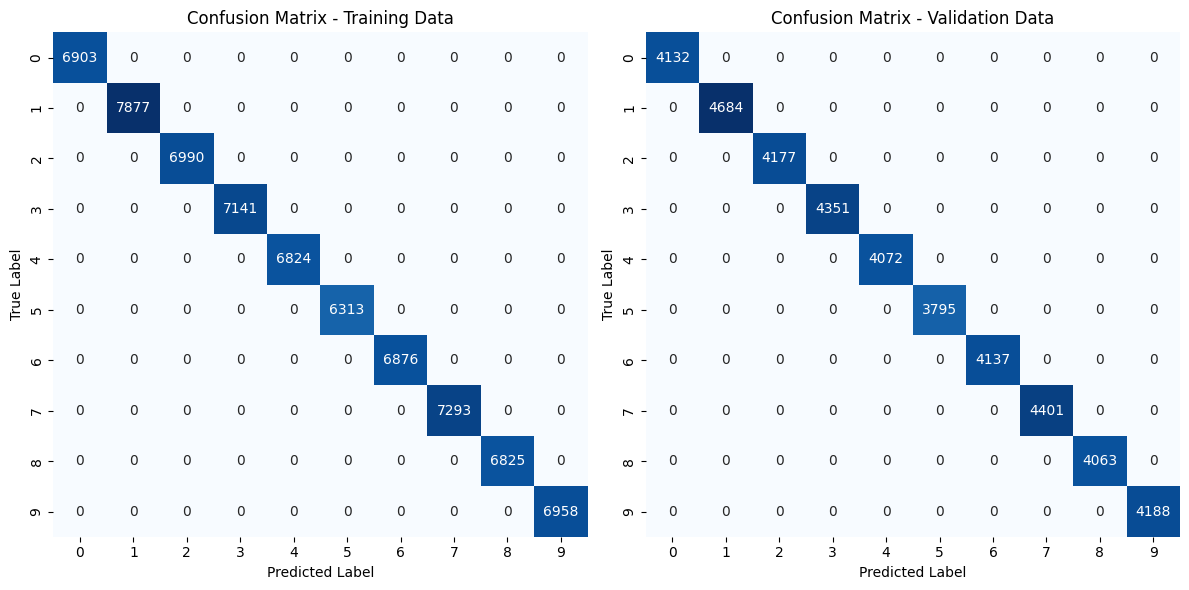

<Figure size 640x480 with 0 Axes>

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate confusion matrices for training and validation predictions
conf_matrix_train = confusion_matrix(y_train_labels, pred_tr)
conf_matrix_val = confusion_matrix(y_val_labels, pred_val)

# Plot confusion matrix for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot confusion matrix for validation data
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()
plt.savefig('Confusion matrix')